In [111]:
# Algorithmic Trading Strategy [Mean Reversion] in Python using Bollinger Bands/RSI !BEGINNER FRIENDLY
# https://www.youtube.com/watch?v=AXc1YAsCduI&t=137s

In [112]:
import yfinance as yf
# data handling
import pandas as pd
# calculation purporses
import numpy as np
# technical indictor
import ta
# for visualization
import matplotlib.pyplot as plt

In [114]:
df = yf.download('SPY', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [115]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,236.102325,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,230.468277,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,238.187988,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,240.066025,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,242.321503,102512600
...,...,...,...,...,...,...
2022-09-02,400.279999,401.559998,390.329987,392.239990,392.239990,99574100
2022-09-06,393.130005,394.119995,388.420013,390.760010,390.760010,76637400
2022-09-07,390.429993,398.589996,390.200012,397.779999,397.779999,70964200


In [116]:
df['ma_20'] = df.Close.rolling(20).mean()
# rolling standard deviation
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2*df.vol)
df['lower_bb'] = df.ma_20 - (2*df.vol)

<AxesSubplot:xlabel='Date'>

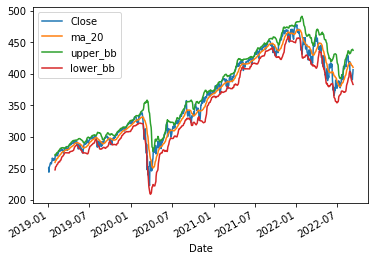

In [117]:
df[['Close','ma_20','upper_bb','lower_bb']].plot()

In [125]:
df['rsi'] = ta.momentum.rsi(df.Close, window=6)

In [126]:
conditions = [(df.rsi < 30) & (df.Close < df.lower_bb),
              (df.rsi > 70) & (df.Close < df.upper_bb)]

In [127]:
choices = ['Buy', 'Sell']

In [128]:
df['signal'] = np.select(conditions, choices)

In [ ]:
# close row before == shifted_close
df['shifted_Close'] = df.Close.shift()

In [129]:
df.dropna(inplace=True)

In [130]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal,shifted_Close
Date,,,,,,,,,,,,,
2022-06-30,376.239990,380.660004,372.559998,377.250000,377.250000,112508300,388.146500,17.023458,422.193416,354.099583,40.616070,0,380.339996
2022-07-01,376.559998,381.700012,373.799988,381.239990,381.239990,74839700,386.338998,15.616017,417.571033,355.106964,49.074150,0,377.250000
2022-07-05,375.880005,381.980011,372.899994,381.959991,381.959991,81438000,384.909998,14.556579,414.023156,355.796840,50.597823,0,381.239990
2022-07-06,382.109985,385.869995,379.600006,383.250000,383.250000,70426200,383.482997,13.109819,409.702636,357.263359,53.583652,0,381.959991
2022-07-07,385.119995,389.829987,383.269989,388.989990,388.989990,64525900,382.145497,10.808172,403.761841,360.529153,64.908267,0,383.250000
2022-07-08,387.269989,390.640015,385.660004,388.670013,388.670013,72397800,381.017998,8.557338,398.132673,363.903322,63.865925,0,388.989990
2022-07-11,385.850006,386.869995,383.500000,384.230011,384.230011,58366900,380.157498,7.144310,394.446118,365.868879,50.391420,0,388.670013
2022-07-12,383.649994,386.160004,378.989990,380.829987,380.829987,62219200,379.708998,6.779356,393.267710,366.150286,42.208258,0,384.230011
2022-07-13,375.100006,381.920013,374.660004,378.829987,378.829987,84224600,379.900497,6.692880,393.286258,366.514737,37.867547,0,380.829987


In [131]:
# shifts Buy/Sell buy one row down so that you can buy/sell on the open of next day
df.signal = df.signal.shift()

In [132]:
position = False
buydates, selldates = [], []
buyprices, sellprices = [], []

In [148]:
for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
    if position:
        if row['signal'] == 'Sell':
            selldates.append(index)
            sellprices.append(row.Open)
            position = False

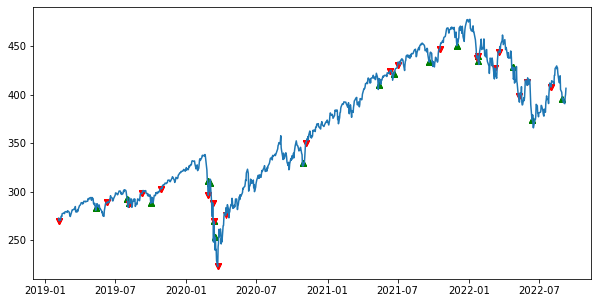

In [149]:
plt.figure(figsize=(10, 5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^',c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='v',c='r')

In [150]:
#output is in percentage %
returns = (pd.Series([(sell - buy)/ buy for sell, buy in zip(sellprices, buyprices)]) + 1).prod() - 1
returns

-0.8116968379890114

In [151]:
# close row before == shifted_close
df['shifted_Close'] = df.Close.shift()